# Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

# Load Data

In [2]:
blueberry_df = pd.read_csv("wild_blueberry_yield.csv")
blueberry_df = blueberry_df.drop(columns=["id"])

label = "yield"
features = list(blueberry_df.columns)
features.remove(label)

blueberry_df.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


# Data Analysis

In [3]:
blueberry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [4]:
blueberry_df.describe(percentiles=[])

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [5]:
heatmap_cols = features + [label]
heatmap_data = blueberry_df[heatmap_cols].corr()
heatmap_fig = px.imshow(
  heatmap_data,
  x=heatmap_cols,
  y=heatmap_cols,
  aspect="auto",
)
heatmap_fig.update_xaxes(side="top")

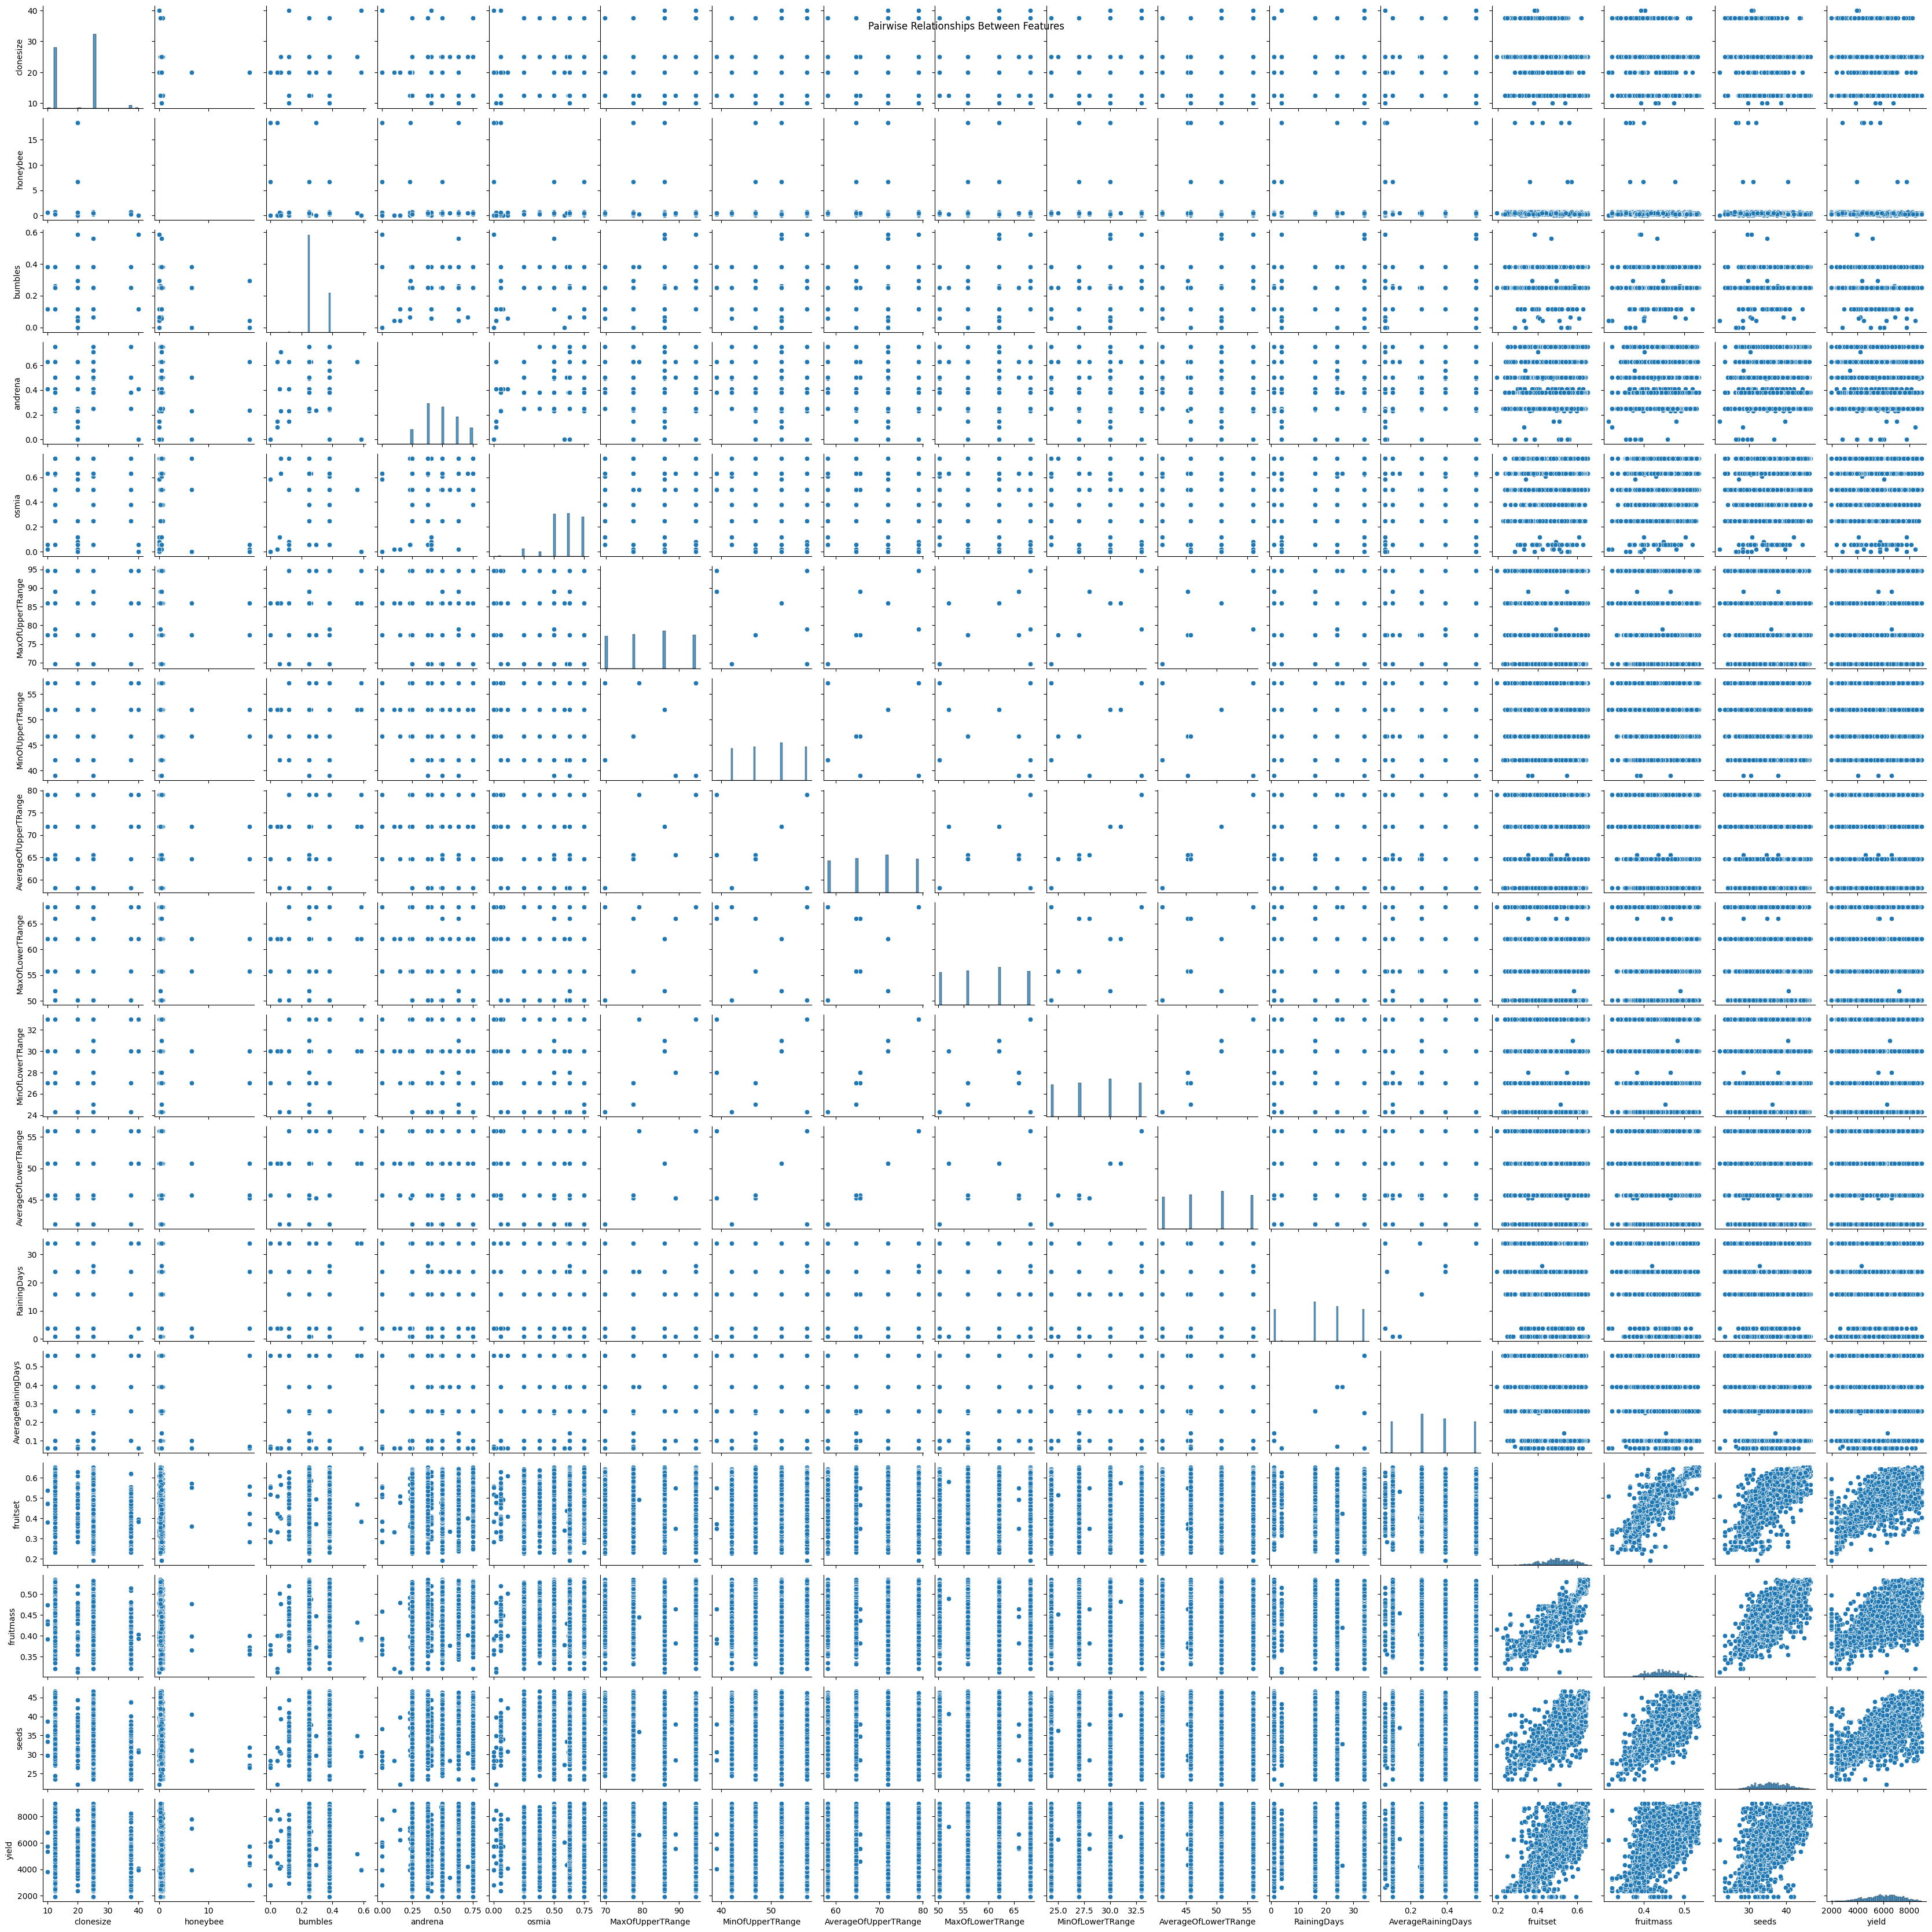

In [6]:
plot = sns.pairplot(blueberry_df, height = 2)
plot.fig.suptitle("Pairwise Relationships Between Features")
plt.show()

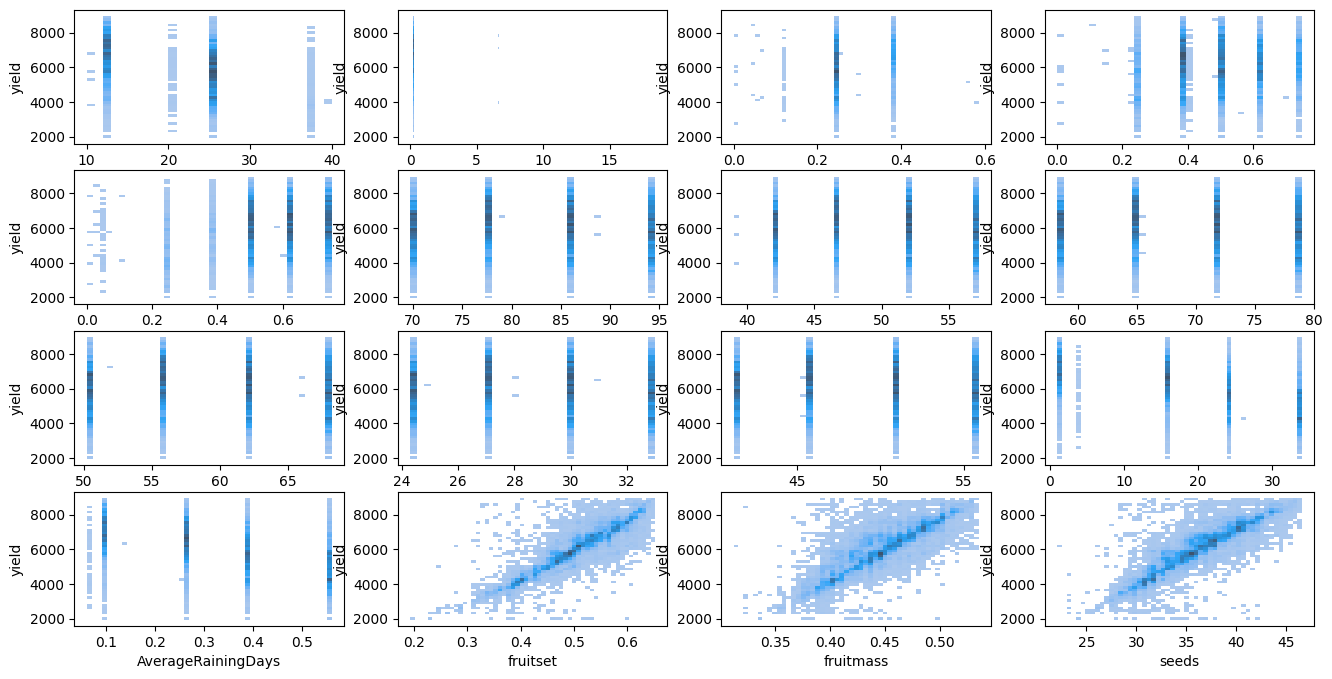

In [7]:
size = 4
fig, axs = plt.subplots(size, size, figsize=(size * 4, size * 2))
for i in range(len(features)):
    ax = axs[i // size, i % size]
    sns.histplot(x=features[i], y="yield", data=blueberry_df, ax=ax)
    i = i+1
plt.show()

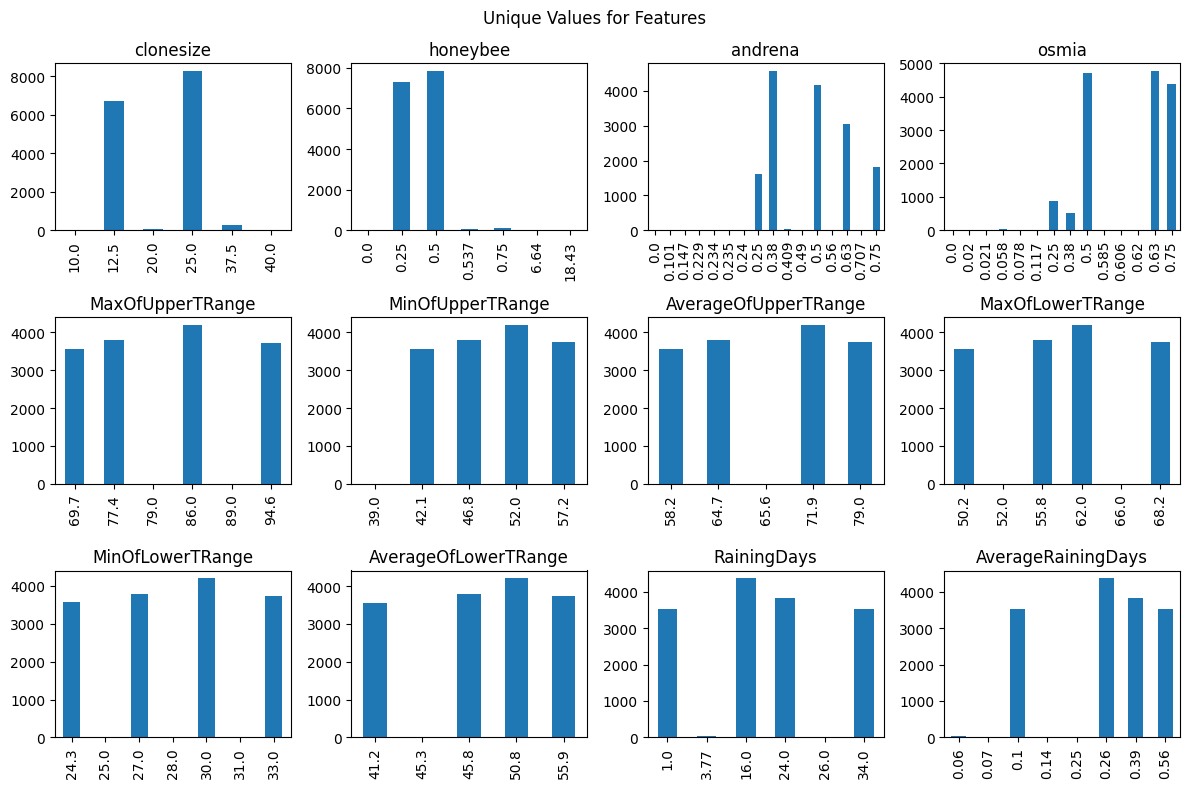

In [8]:
ignore_cols = ["bumbles", "fruitset", "fruitmass", "seeds"]
columns_to_analyze = [col for col in features if col not in ignore_cols]
num_rows = 3
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_rows * 4, num_cols * 2))
fig.suptitle('Unique Values for Features')

for i, column in enumerate(columns_to_analyze):
    ax = fig.axes[i]
    value_counts = blueberry_df[column].value_counts()
    value_counts = value_counts.sort_index()
    value_counts.plot(kind="bar", ax=ax)
    ax.set_title(f"{column}")

plt.tight_layout()
plt.show()

In [9]:
fig_2d = px.scatter(
    blueberry_df,
    x="fruitmass",
    y="fruitset",
    color="seeds",
    opacity=0.7,
)
fig_2d.update_traces(marker_size=3)

In [10]:
fig_3d = px.scatter_3d(
    blueberry_df,
    x="fruitmass",
    y="fruitset",
    z="seeds",
    color="RainingDays",
    opacity=0.7
  )
fig_3d.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig_3d.update_traces(marker_size=4)